# Claim 2 : Final Graph - Bayesian analysis

In [1]:
# move to notebooks directory
%cd ..

/home/bro/Documents/FRI/MLDS/repro/MLDS/notebooks


In [2]:
## IMPORTS

# import standard data science libraries
import numpy as np
import pandas as pd

# import ggplot for graphing
import plotnine
from plotnine import ggplot, aes, geom_line, geom_point, geom_errorbar, \
                     facet_wrap, position_dodge, theme, geom_violin, xlab, ylab, \
                     coord_flip, geom_bar, element_text, scale_x_discrete, scale_fill_manual, \
                     geom_hline, xlim, ylim, scale_color_discrete, geom_text, position_stack

# suppress any warnings
import warnings

# import helper functions
from utils.helper_functions import plot_fig_4, likelihood_of_being_better, likelihood_of_improvement, \
                             plot_distribution, check_top_scores, check_improvement, check_heuristic, \
                             plot_comparison, plot_comparison_x, check_improvement_by_x, comparison_rnd_by_x, \
                             check_best_scores, check_best_rt_scores, check_rnd_best, check_rnd_one_of_the_best

# import helper functions
from utils.helper_functions import plot_fig_4, likelihood_of_being_better, likelihood_of_improvement

## CONSTANTS

# 95-percentile
Q_95 = 1.00 

# region of practical equivalence
ROPE = 0.005

# classification dataset order
CLASSIFICATION_ORDER = ["heart", "breast-cancer", "haberman", "ionosphere", "diabetes", "german-credit", "juvenile", "recidivism"]

# regression dataset order
REGRESSION_ORDER = ["friedman1", "friedman3", "diabetes-regr", "music", \
                 "red-wine", "abalone", "satellite-image", "california-housing"]

# Data for modelling

In [22]:
# load & combine datasets
classification_dt = pd.read_csv("results/claim_1_1_ccp_comparison_classification.csv")
classification_ccp = pd.read_csv("results/claim_1_1_dt_comparison_classification.csv")
rf = pd.read_csv("results/rf_comparison_classification.csv").drop(['Unnamed: 0'], axis = 1)
classification = pd.concat([classification_dt, classification_ccp])

# calculate data for modelling
regvec = check_best_scores(classification, CLASSIFICATION_ORDER, size_tol = 0.50, savevec = ["modelling/data/reg-hs.csv", "modelling/data/reg-lbs.csv", "modelling/data/reg-ccp.csv", "modelling/data/reg-hsccp.csv"])

# calculate best scores distribution for modelling for rf
check_best_rt_scores(rf, CLASSIFICATION_ORDER, savevec = ["modelling/data/any-mtry-classification.csv", "modelling/data/any-depth-classification.csv", "modelling/data/any-rf-classification.csv"])

# check for random sample distribution
check_rnd_best(rf, CLASSIFICATION_ORDER, save_to = "modelling/data/random-rf.csv")

# check for random sample distribution (best functions can't overlap - multiple functions best)
check_rnd_one_of_the_best(rf.copy(), CLASSIFICATION_ORDER, rope = 0.10, savevec = ["modelling/data/reg-hsrf.csv", "modelling/data/reg-dmax.csv", "modelling/data/reg-mtry.csv"])

# 1.1 Decision trees (DT)

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* ind

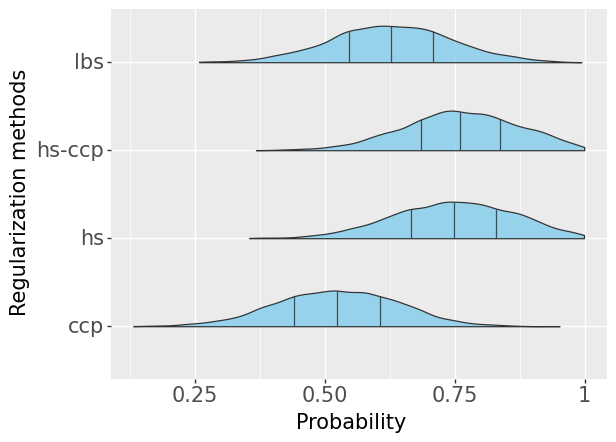

<ggplot: (8761995975945)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/claim_2/reg-dt.png
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavi

In [29]:
hs = pd.read_csv("modelling/data/reg-hs-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "hs"})
ccp = pd.read_csv("modelling/data/reg-ccp-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "ccp"})
hsccp = pd.read_csv("modelling/data/reg-hsccp-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "hs-ccp"})
lbs = pd.read_csv("modelling/data/reg-lbs-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "lbs"})
rand = hs.copy()
rand["ccp"] = np.array(ccp["ccp"])
rand["hs-ccp"] = np.array(hsccp["hs-ccp"])
rand["lbs"] = np.array(lbs["lbs"])

# classification_random = pd.read_csv("modelling/data/ccp-classification.csv")
# regression_random = pd.read_csv("modelling/data/ccp-regression.csv")
# regression_random["dataset"] += 8
# random = pd.concat([classification_random, regression_random])
# random.to_csv("modelling/data/random.csv")

disp = pd.melt(rand, value_vars=["hs", "ccp", "lbs", "hs-ccp"], value_name='sample')
disp.loc[disp.variable == "theta_upper[1]", "variable"] = "$p_{better}$"
disp.loc[disp.variable == "theta_upper[2]", "variable"] = "$p_{same}$"

g = (
    ggplot(disp, aes(x="variable", y="sample"))
    + geom_violin(disp, draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
    # + geom_hline(yintercept = 0, linetype = "dashed", color = "red")
    + theme(text=element_text(size=15))
    + xlab("Regularization methods")
    + ylab("Probability")
    # + geom_text(disp_mu, aes(x="parameters", y="value", label = "value_str"), nudge_x = -0.2, size = 10)
    + coord_flip()
    # + facet_wrap("var")
)
display(g)
g.save(filename = "graphs/claim_2/reg-dt.png", height = 5, width = 5, units = "in", dpi = 100)

# 1.2 Random Forest (RF)

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* ind

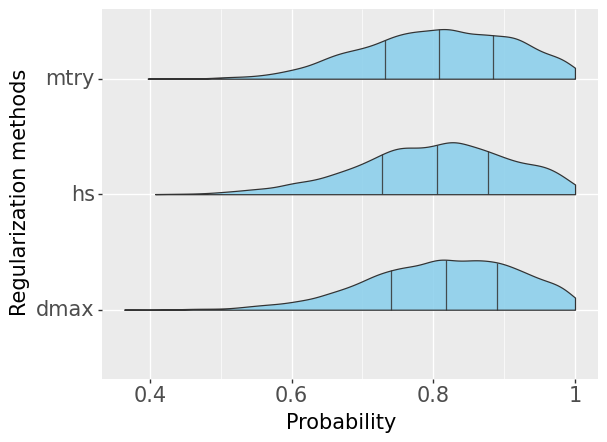

<ggplot: (8761998606520)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/claim_2/reg-rf.png
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavi

In [5]:
# classification_random = pd.read_csv("modelling/data/ccp-classification.csv")
# regression_random = pd.read_csv("modelling/data/ccp-regression.csv")
# regression_random["dataset"] += 8
# random = pd.concat([classification_random, regression_random])
# random.to_csv("modelling/data/random.csv")

hsrf = pd.read_csv("modelling/data/reg-hsrf-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "hs"})
dmax = pd.read_csv("modelling/data/reg-dmax-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "dmax"})
mtry = pd.read_csv("modelling/data/reg-mtry-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "mtry"})
rand = hsrf.copy()
rand["dmax"] = np.array(dmax["dmax"])
rand["mtry"] = np.array(mtry["mtry"])

disp = pd.melt(rand, value_vars=["hs", "dmax", "mtry"], value_name='sample')
disp.loc[disp.variable == "theta_upper[1]", "variable"] = "$p_{better}$"
disp.loc[disp.variable == "theta_upper[2]", "variable"] = "$p_{same}$"

g = (
    ggplot(disp, aes(x="variable", y="sample"))
    + geom_violin(disp, draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
    # + geom_hline(yintercept = 0, linetype = "dashed", color = "red")
    + theme(text=element_text(size=15))
    + xlab("Regularization methods")
    + ylab("Probability")
    # + geom_text(disp_mu, aes(x="parameters", y="value", label = "value_str"), nudge_x = -0.2, size = 10)
    + coord_flip()
    # + facet_wrap("var")
)
display(g)
g.save(filename = "graphs/claim_2/reg-rf.png", height = 5, width = 5, units = "in", dpi = 100)

# Appendix B

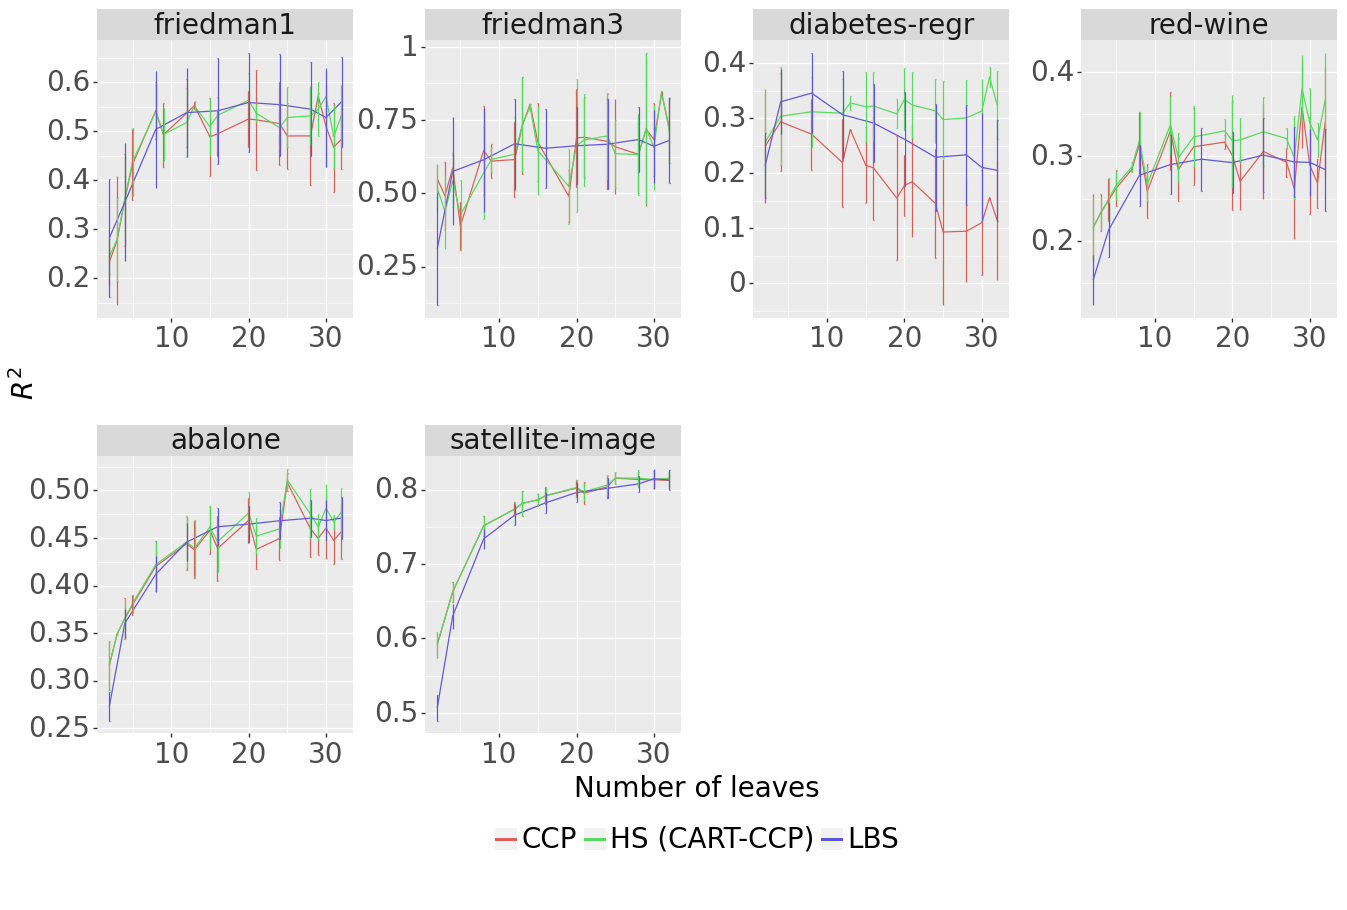

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 20 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/claim_2/fig_4_dt-reg.png


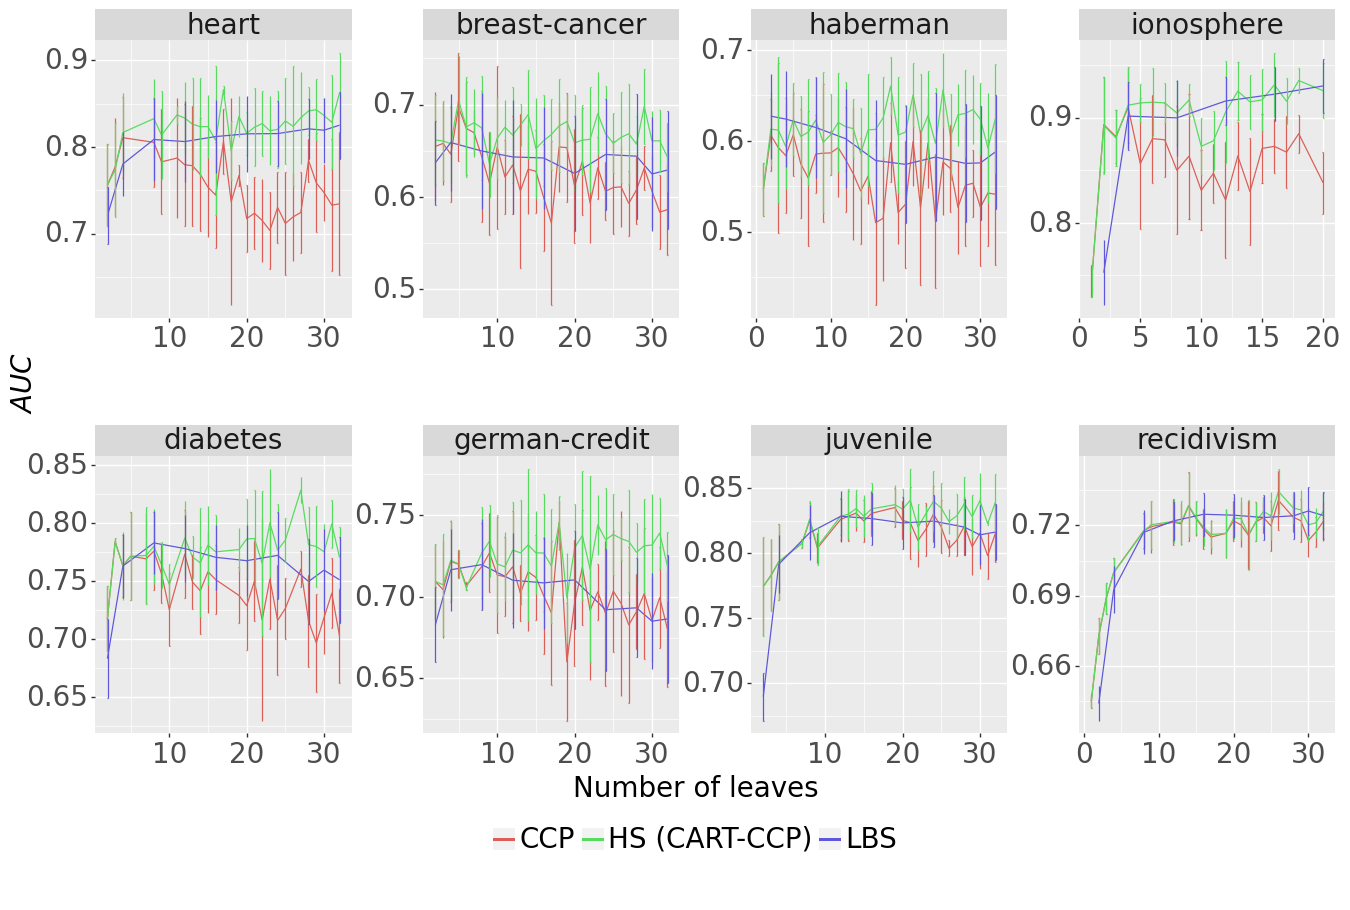

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 20 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/claim_2/fig_4_dt-class.png


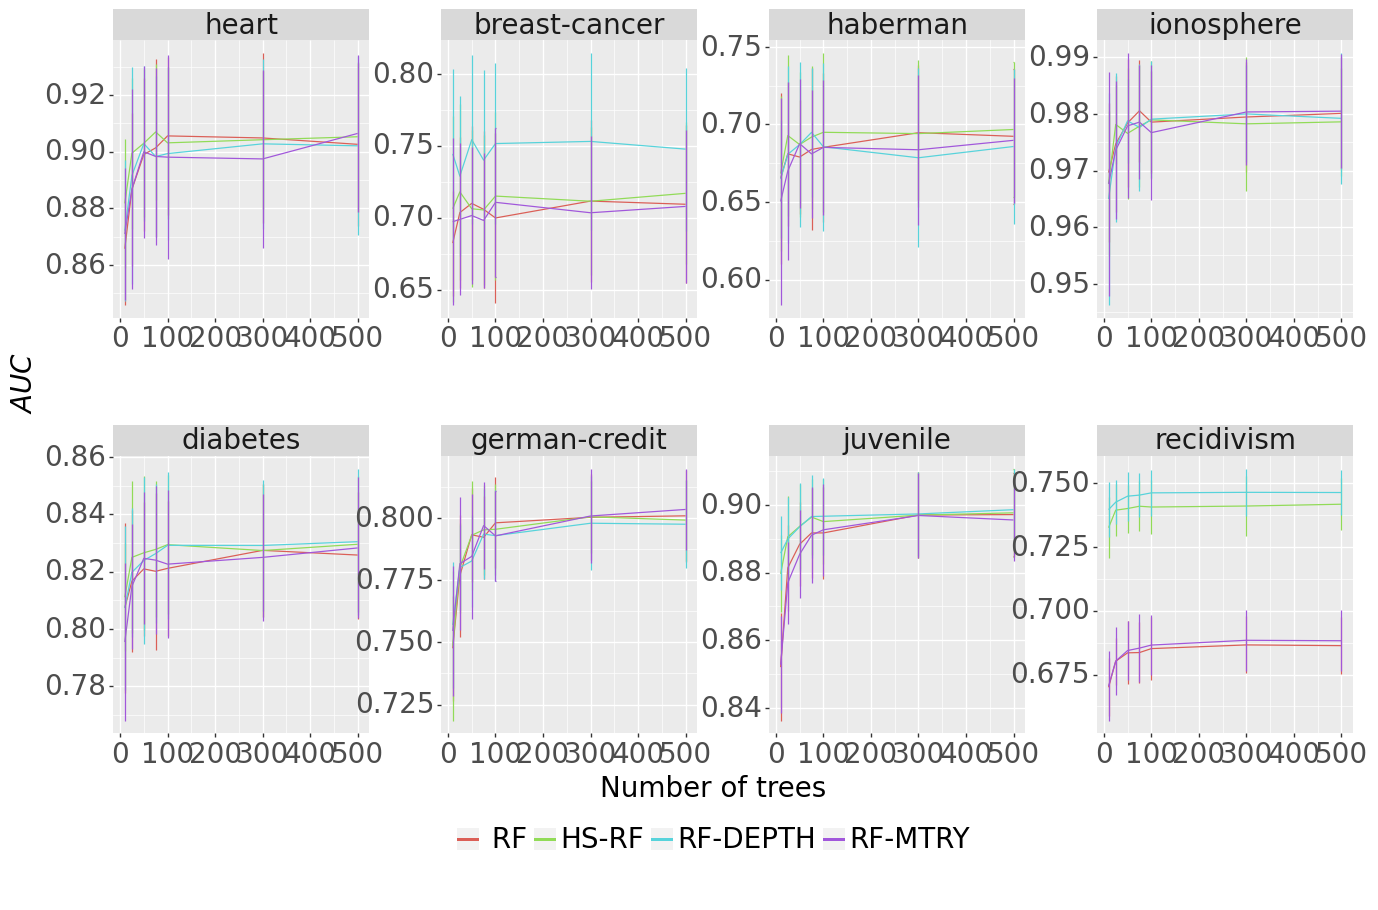

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 20 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/claim_2/fig_4_rf-class.png


In [8]:
# plot regression in fig 4 style
regression = pd.read_csv("results/claim_1_1_ccp_comparison_regression.csv")
plot_fig_4(regression, REGRESSION_ORDER, target = "$R^2$", save_to = "graphs/claim_2/fig_4_dt-reg.png")

# plot classification in fig 4 style
classification = pd.read_csv("results/claim_1_1_ccp_comparison_classification.csv")
plot_fig_4(classification, CLASSIFICATION_ORDER, target = "$AUC$", save_to = "graphs/claim_2/fig_4_dt-class.png")

# plot RF in fig 4 style
rf = pd.read_csv("results/rf_comparison_classification.csv").drop(['Unnamed: 0'], axis = 1)

# make sure RF is alphabetically before HS
rf.loc[rf["algorithm"] == "RF", "algorithm"] = " RF"
plot_fig_4(rf, CLASSIFICATION_ORDER, target = "$AUC$", save_to = "graphs/claim_2/fig_4_rf-class.png")

In [28]:
np.mean(pd.read_csv("modelling/data/reg-hs.csv")["imp"] == 2)

0.8025442477876106

In [24]:
np.mean(pd.read_csv("modelling/data/reg-hsccp.csv")["imp"] == 2)

0.8119469026548672

In [25]:
np.mean(pd.read_csv("modelling/data/reg-lbs.csv")["imp"] == 2)

0.6548672566371682

In [26]:
np.mean(pd.read_csv("modelling/data/reg-ccp.csv")["imp"] == 2)

0.543141592920354